# Wrangle & Analyze WeRateDogs Twitter Data

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
    - [Visual Assessment](#visassess)
    - [Programatic Assessment](#progassess)
- [Cleaning the Data](#clean)
    - [Quality Issues](#quality)
    - [Tidiness Issues](#tidiness)
- [Storing the data](#store)
- [Data Analysis and Visualization](#anaviz)
- [Conclusion](#conclusion)

<a id='intro'></a>
### Introduction

> **Wrangle & Analyze WeRateDogs twitter data project**
> WeRateDogs is a popular twitter account with 8.5M followers. We will be doing analysis on their archival data from Nov 2015 - Jul 2017. The main goal of the project is to wrangle the twitter archival data, assess, clean and analyze in order to find out meaningful insights and create interesting visaulizations. Wrangling will include gathering the data from various sources regarding tweets posted on weratedogs. Weratedogs rates variety of dog related tweets, which includes images of dogs and a rating given out of 10. Usually, it is anything above 10 out of 10.  
> The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets. We will be using the previously collected archive data and image data for the duration after August 1 2017. Additinal information like retweet counts and favorite counts will be extracted using twitter api. We will be using only original tweets and not the retweets for our analysis.
> We will be doing the analysis around which dogs gets higher ratings, which tweets gets more rewteets/likes and if there is any imact on ratings and retweet count/favorite count based on stage of the dogs.

<a id='gather'></a>
## Gathering Data

> We need to gather/access the data from the three different sources and save them in pandas DataFrames in order to perform analysis.
- ***twitter archival data(csv)***
- ***image prediction data(tsv)***
- ***additional data using twitter API*** 

In [1]:
# importing all the necessary python libraries
import pandas as pd
import numpy as np
import zipfile

>***1***. Download the file ***'twitter-archive-enhanced.csv'*** manually by clicking the link: twitter_archive_enhanced.csv

In [2]:
# reading a ready to use(file on hand) csv file 'twitter-archive-enhanced.csv' and save it to a pandas dataframe
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

>***2***. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file ***image_predictions.tsv*** is hosted on Udacity's servers https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# import the requests library in order for us to download and read the contents of a tsv file using above url
import requests

In [4]:
# assigning the url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
# get the response using requests.get
response = requests.get(url)

In [6]:
# write the response in a tsv file
with open('image_prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
# importing the image_predictions.tsv file into pandas dataframe
# All tsv files are flat files so we can use read_csv to download and save the contents in pandas dataframe
image_pred = pd.read_csv('image_prediction.tsv', sep='\t')

>***3***. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the ***Twitter API*** for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called ***tweet_json.txt*** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [8]:
# import necessary python libraries 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [9]:
#This block of code was executed separately to get json.txt

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

#consumer_key = 'Hidden'
#consumer_secret = 'Hidden'
#access_token = 'Hidden'
#access_secret = 'Hidden'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_arch.tweet_id.values
#len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#       count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [10]:
# Create a DataFrame to store additional data
additional_data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
#Read the tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        additional_data = additional_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))

additional_data = additional_data.reset_index(drop=True)


<a id='assess'></a>
## Assessing Data

<a id='visassess'></a>
### Visual Assessment:
- Taking a look at all three DataFrames for visual assessment

In [11]:
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coleman. Somebody needs to tell him th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None


In [12]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False


In [13]:
additional_data.sample(5)

,tweet_id,retweet_count,favorite_count
1199,714251586676113411,836,3299
1092,732585889486888962,783,3694
1327,704054845121142784,926,2957
2139,669363888236994561,219,606
410,821407182352777218,4484,12081


#### Visual assessment findings:
>Upon intial visual assessment of all three dataframes twitter_arch, image_pred and additional_data, below are some issues which needs our attention:
>> #### twitter_arch
- 'name' column has captured 'a','an' and 'the' for some dog names where the actual name is not available
- There are four columns describing dog type such as doggo, pupper, puppo, foofer, which can be one column
- rating_denominator column has values other than 10
- rating_numerator column has some very high values
>>#### image_pred 
- p1 and p1_dog columns can be merged, same way p2 & p2_dog , p3 & p3_dog
>>#### additional_data
- This data can be merged with twitter_arch

<a id='progassess'></a>
#### Programmatic assessment 
- Let's use pandas functions and/or methods to further assess the data.

In [14]:
# First look
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# Checking some more sample data
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo,None,None,None
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
223,849412302885593088,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None


In [16]:
# Checking any missing data, columns and datatypes
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- There are 181 retweet records with retweet_id, retweet_user_id, which needs to be eliminated.
- timestamp has data type as object

In [17]:
# Checking min, max values for rating columns
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Finding out how many rows are there with rating_denominator > 10
len(twitter_arch[twitter_arch['rating_denominator'] > 10])

20

In [19]:
# Finding out how many rows with rating_denominator = 0
len(twitter_arch[twitter_arch['rating_denominator'] == 0])

1

In [20]:
# Checking rows with rating_denominator not equal to 10
len(twitter_arch[twitter_arch['rating_denominator'] != 10])

23

- There are 23 rows where rating_denominator is not equal to 10

In [21]:
# Checking value counts for all denominators
twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- Some of the rating_denominator values are multiples of 10

In [22]:
# Check few rows to get an idea where denominator is anything other than 10 like 11, 50, 15
print(twitter_arch.loc[twitter_arch.rating_denominator == 11, 'text']) 
print(twitter_arch.loc[twitter_arch.rating_denominator == 50, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 15, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 120, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 2, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 16, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 7, 'text'])
print(twitter_arch.loc[twitter_arch.rating_denominator == 0, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [23]:
# check the above indexes and use text information to figure out correct rating
print(twitter_arch['text'][784]) #actual rating is 14/10
print(twitter_arch['text'][1068])  #actual rating is 14/10
print(twitter_arch['text'][1662]) #actual rating is 10/10
print(twitter_arch['text'][1202]) #actual rating is 11/10
print(twitter_arch['text'][2335]) #actual rating is 9/10
print(twitter_arch['text'][313])  #actual rating is 13/10

print(twitter_arch['text'][1274]) #actual rating is 45/50 -- There are 5 dogs in the picture
print(twitter_arch['text'][1351]) #actual rating is 60/50 -- There are 5 dogs in the picture
print(twitter_arch['text'][1779]) #actual rating is 144/120 -- There are 12 dogs in the picture

print(twitter_arch['text'][342])  #No rating - delete
print(twitter_arch['text'][1663])  #no rating --delete
print(twitter_arch['text'][516]) #no rating --delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6M

- It looks like denominator which is a multiple of 10 has more than one dog
- And rest are either captured incorrectly or no rating is available

In [24]:
# Finding how many rows with rating_numerator = 0
len(twitter_arch[twitter_arch['rating_numerator'] == 0])

2

- There are 2 rows with rating_numerator = 0

In [25]:
# checking value counts for numerator
twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# Check few rows to get an idea where rating_numerator doesn't seem to have reasonable value
print(twitter_arch.loc[twitter_arch.rating_numerator == 420, 'text']) 
print(twitter_arch.loc[twitter_arch.rating_numerator == 144, 'text'])
print(twitter_arch.loc[twitter_arch.rating_numerator == 666, 'text'])
print(twitter_arch.loc[twitter_arch.rating_numerator == 960, 'text'])
print(twitter_arch.loc[twitter_arch.rating_numerator == 1776, 'text'])
print(twitter_arch.loc[twitter_arch.rating_numerator == 0, 'text'])

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object


In [27]:
# check the above indexes and use text to figure out correct rating
print(twitter_arch['text'][188]) #duplicate of 2074 - delete
print(twitter_arch['text'][2074]) #not a actual dog rating but snoop dog's image --delete
print(twitter_arch['text'][1779]) #has multiple dogs 144/120
print(twitter_arch['text'][189]) #actual rating is 666/10 - keep
print(twitter_arch['text'][313]) #actual rating is 13/10
print(twitter_arch['text'][979]) #actual rating is 1776/10 - delete as this would considered an outlier
print(twitter_arch['text'][315]) #actual rating 0/10 -keep
print(twitter_arch['text'][1016]) #not a dog image -delete

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [28]:
# checking rows with numerators higher than 100
twitter_arch[(twitter_arch['rating_numerator'] > 100)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


- It looks like lot of these records are retweets, and won't be part of our analysis
- Rest needs to be manually corrected.

In [29]:
# Try to find out how many dog stages have been recorded
print(twitter_arch.doggo.value_counts())
print(twitter_arch.floofer.value_counts())
print(twitter_arch.pupper.value_counts())
print(twitter_arch.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


- Very low number of dog stages have been recorded compare to the total number of tweets
- It will be helpful to use these 4 columns merged into one column showing the dog stage 

In [30]:
# Checking if there are any tweet_ids duplicated
twitter_arch['tweet_id'].nunique()

2356

In [31]:
# Checking if there are any duplicates
sum(twitter_arch['tweet_id'].duplicated())

0

- No duplicate tweet_ids

In [32]:
# Checking if there are any records after August 1st 2017
twitter_arch[twitter_arch['timestamp']>'2017-08-01 24:60:60 +0000']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- No records after August 1 2017

In [33]:
# Checking the count for values a, an, the for name column
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Toby            7
Bailey          7
an              7
Daisy           7
Buddy           7
Rusty           6
Jack            6
Milo            6
Dave            6
Stanley         6
Oscar           6
Bella           6
Scout           6
Koda            6
Leo             6
Jax             6
Bentley         5
             ... 
Mike            1
Kevon           1
Bowie           1
Colin           1
Tom             1
Carbon          1
Vinnie          1
Cermet          1
Marty           1
Bradlay         1
Lilah           1
Sweet           1
Ron             1
Craig           1
Ruffles         1
Marvin          1
Willem          1
Brandonald      1
Chevy           1
Doobert         1
Dotsy           1
Cheryl          1
Stephanus       1
Durg            1
all       

- a, an, the values needs to be changed to None

In [34]:
# First look
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1344,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,1,Shetland_sheepdog,0.129034,True,kelpie,0.117508,True,Siberian_husky,0.106708,True
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
710,685307451701334016,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True


In [36]:
# checking number of rows, columns, datatypes
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
# checking if there are any duplicate jpeg_urls
sum(image_pred['jpg_url'].duplicated())

66

- 66 rows with duplicate jpg_url

In [39]:
image_pred[image_pred['jpg_url'].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [40]:
# checking the count for different image number
image_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [41]:
# checking the predition -is it a dog breed?- true/false counts
print(image_pred.p1_dog.value_counts())
print(image_pred.p2_dog.value_counts())
print(image_pred.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


- Around 1/4 of predictions are not even dogs for all p1, p2, p3
- Each prediction column can be merged with dog column - p1+p1_dog, p2+p2_dog and p3+p3_dog -- Values will be
  either dog name or notadog

In [42]:
# first look
additional_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7802,36634
1,892177421306343426,5783,31565
2,891815181378084864,3826,23781
3,891689557279858688,7964,39956
4,891327558926688256,8609,38153


In [43]:
additional_data.sample(5)

,tweet_id,retweet_count,favorite_count
2020,671520732782923777,517,1367
620,793271401113350145,2483,8998
2215,667911425562669056,289,474
1899,674063288070742018,2154,6258
611,794355576146903043,10708,0


In [44]:
# columns. row count and data types
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id          2329 non-null object
retweet_count     2329 non-null object
favorite_count    2329 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


- all the column datatype needs to be changed to int64

In [45]:
additional_data.describe()

,tweet_id,retweet_count,favorite_count
count,2329,2329,2329
unique,2329,1694,1997
top,820690176645140481,2935,0
freq,1,5,164


- Data from additional_data like retweet_count and favorite_count can be merged with twitter_arch data 

# Data Assement Findings:

***Data Quality Issues***

>***twitter_arch_clean***
- 1. Remove 181 retweet records
- 2. Delete columns which will not be used for analysis like 
                in_reply_to_status_id         
                in_reply_to_user_id                               
                source
                retweeted_status_id          
                retweeted_status_user_id      
                retweeted_status_timestamp
                expanded_urls
- 3. Manually update the incorrect denominators for the records - indexes =1068,1662,1202,2335,313
- 4. Delete the rows with indexes = 979,342,516,1663 - No rating available
- 5. Manually update/delete the incorrect numerators for the records --188, 2074, 1016
- 6. rating_denominator > 10 -- 1274,1351,1779 -- there are multiple dogs in the image -- Add a column 'rating'
     to represent the ratings = (10*numerator)/denominator
- 7. Delete the rating_denominator, rating_numerator columns
- 8. Replace the values 'a','an','the' for 'name' column to 'None'
- 9. Remove the timezone from timestamp and change the datatype to datetime for timestamp

>***image_pred_clean***
- 9. Rows with duplicate jpg_url needs to be removed from iamge_pred(66)

>***aditional_data_clean***
- 10. Change the datatypes for tweet_id, retweet_count and favorite_count to numeric

***Data Tidiness Issues***

- 1. ***twitter_arch_clean***There are three columns describing dog type such as doggo, pupper, puppo, foofer which can be one column dog_stage
- Delete the columns which won't be useful for analysis
- 2. ***image_pred*** Each prediction column can be merged with dog column - p1+p1_dog, p2+p2_dog and p3+p3_dog -- Values will be either dog name or notadog
- Delete the columns which won't be useful for analysis
- 3. ***merge all three DataFrames*** Merge twitter_arch, image_pred & additional_data so that retweet_count, favorite_count,image predictions and tweet information can be available for each tweet in one row

<a id='clean'></a>
## Data Cleaning

> ***Make a copy of the original data prior to cleaning***

In [46]:
# Copying the data prior to data cleaning process
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
additional_data_clean = additional_data.copy()

<a id='quality'></a>
### Fixing Data Quality Issues:

>**1. Define** - There are 181 retweet records in twitter_arch_clean, which needs to be removed.

In [47]:
# Checkinh the retweets count 
len(twitter_arch_clean[(twitter_arch_clean['retweeted_status_id'].notnull() == True)])

181

>**Code**

In [48]:
# Get names of indexes for the column 'retweeted_status_id' which has non null values
indexNames = twitter_arch_clean[(twitter_arch_clean['retweeted_status_id'].notnull() == True)].index
 
# Delete these row indexes from dataFrame
twitter_arch_clean.drop(indexNames , inplace=True)

>**Test**

In [49]:
len(twitter_arch_clean[(twitter_arch_clean['retweeted_status_id'].notnull() == True)])

0

In [50]:
# Check retweet related columns shows 0 row values
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

>**2. Define** - Drop the columns( in_reply_to_status_id ,in_reply_to_user_id, source,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls from twitter_arch_clean which will not be used for analysis.

>**Code**

In [51]:
# delete the columns which won't be useful for analysis using drop
twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id',
                                              'in_reply_to_user_id',
                                              'source',
                                              'retweeted_status_id',
                                              'retweeted_status_user_id',
                                              'retweeted_status_timestamp',
                                              'expanded_urls'], axis=1)

>**Test**

In [52]:
list(twitter_arch_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [53]:
# Check the deleted columns
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


>**3. Define** - Manually update the rating_denominator = 10 for rows with indexes 1068,1662,1202,2335,313

>**Code**

In [54]:
#using the indexes based on our findings, manually update the denominator to 10
twitter_arch_clean.loc[1068,'rating_denominator'] = 10 
twitter_arch_clean.loc[1662,'rating_denominator'] = 10  
twitter_arch_clean.loc[1202,'rating_denominator'] = 10  
twitter_arch_clean.loc[2335,'rating_denominator'] = 10  
twitter_arch_clean.loc[313,'rating_denominator'] = 10 

>**Test**

In [55]:
#twitter_arch_clean['rating_denominator'].value_counts()
print(twitter_arch_clean['rating_denominator'][1068]) 
print(twitter_arch_clean['rating_denominator'][1662]) 
print(twitter_arch_clean['rating_denominator'][1202]) 
print(twitter_arch_clean['rating_denominator'][2335]) 
print(twitter_arch_clean['rating_denominator'][313])

10
10
10
10
10


>**4. Define** - Manually delete the rows for rows with indexes 979,342,1663,516 - no rating_denominator available

>**Code**

In [56]:
# delete the rows using drop
twitter_arch_clean.drop([979,342,516,1663], axis=0, inplace=True)

>**Test**

In [57]:
print(twitter_arch_clean[twitter_arch_clean.index == 342])
print(twitter_arch_clean[twitter_arch_clean.index == 516])
print(twitter_arch_clean[twitter_arch_clean.index == 1663])
print(twitter_arch_clean[twitter_arch_clean.index == 979])

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


>**5. Define** - Manually delete the rows for rows with indexes 188, 2074, 1016 - incorrect rating_numerator

>**Code**

In [58]:
# Delete the rows using drop
twitter_arch_clean.drop([188,2074,1016], axis=0, inplace=True)

>**Test**

In [59]:
print(twitter_arch_clean[twitter_arch_clean.index == 188])
print(twitter_arch_clean[twitter_arch_clean.index == 2074])
print(twitter_arch_clean[twitter_arch_clean.index == 1016])

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


>**6. Define** - rating_denominator > 10 -- There are multiple dogs in the image -- Add a column 'rating'
     to represent the ratings = (10 * rating_numerator)/rating_denominator

>**Code**

In [60]:
# create a new column rating(float type) to solve the problem of incorrect denominator
# most of these tweets contains more than one dog hence the denominator is multiple of 10(120 for 12 dogs)
# rating = (numerator*10)/denominator
# using apply function to create a new column 
twitter_arch_clean['rating'] = twitter_arch_clean.apply(lambda row: (row.rating_numerator * 10) 
                                                        / row.rating_denominator , axis = 1) 


>**Test**

In [61]:
# Check the columns for the dataframe
list(twitter_arch_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

In [62]:
# Check if all the ratings are correct
twitter_arch_clean.rating.value_counts()

12.0     504
10.0     443
11.0     431
13.0     307
9.0      157
8.0       98
7.0       54
14.0      43
5.0       36
6.0       32
3.0       19
4.0       15
2.0       11
1.0        8
666.0      1
17.0       1
26.0       1
15.0       1
960.0      1
0.0        1
75.0       1
27.0       1
50.0       1
182.0      1
Name: rating, dtype: int64

>**7. Define** - Delete rating_numerator & rating_denominator columns from twitter_arch_clean

>**Code**

In [63]:
# Delete the columns using drop
twitter_arch_clean.drop(['rating_denominator','rating_numerator'], axis=1, inplace=True)

>**Test**

In [64]:
# Check the column list after deleteing two columns
list(twitter_arch_clean)

['tweet_id',
 'timestamp',
 'text',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

In [65]:
# Check the data in twitter_arch_clean
twitter_arch_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12.0


>**8. Define** - twitter_clean - replace 'a','an','the' values for name column with None

>**Code**

In [66]:
# replace values a. an. the to None for the column 'name'
twitter_arch_clean.loc[twitter_arch_clean['name'] == 'a', 'name'] = 'None'
twitter_arch_clean.loc[twitter_arch_clean['name'] == 'an', 'name'] = 'None'
twitter_arch_clean.loc[twitter_arch_clean['name'] == 'the', 'name'] = 'None'

>**Test**

In [67]:
# Check the value count for name column
twitter_arch_clean.name.value_counts()

None           744
Lucy            11
Charlie         11
Cooper          10
Oliver          10
Penny            9
Tucker           9
Lola             8
Sadie            8
Winston          8
Daisy            7
Toby             7
Koda             6
Stanley          6
Bo               6
Bailey           6
Jax              6
Bella            6
Oscar            6
Scout            5
Dave             5
Buddy            5
Chester          5
Milo             5
Bentley          5
Leo              5
Louis            5
Rusty            5
Clarence         4
Jack             4
              ... 
Dewey            1
Hanz             1
Karll            1
Donny            1
all              1
Stephanus        1
Jed              1
Cheryl           1
Sparky           1
Clifford         1
Kota             1
Carter           1
Shakespeare      1
Wesley           1
Cermet           1
Bradlay          1
Lilah            1
Sweet            1
Ron              1
Craig            1
Ruffles          1
Butter      

>**9. Define** - Remove the timezone and change the datatype to datetime for timestamp

>**Code**

In [68]:
#Remove the time zone from the 'timestamp' column
twitter_arch_clean['timestamp'] = twitter_arch_clean['timestamp'].str.slice(start=0, stop=-6)

# Change the 'timestamp' column to a datetime object
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

>**Test**

In [69]:
# check the datatype and data for timestamp
twitter_arch_clean.timestamp.dtypes

dtype('<M8[ns]')

In [70]:
twitter_arch_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12.0


>**10. Define** - Rows with duplicate jpg_url needs to be removed from iamge_pred(66)

>**Code**

In [71]:
# Get the indexes for the rows with duplicate jpg_urls
indexes = (image_pred_clean[image_pred_clean['jpg_url'].duplicated() == True]).index

# Delete the rows using the indexes
image_pred_clean.drop(indexes, inplace=True)

>**Test**

In [72]:
# number of duplicate rows for jpg_urls
len(image_pred_clean[image_pred_clean['jpg_url'].duplicated() == True])

0

In [73]:
image_pred_clean[image_pred_clean['jpg_url'].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


>**11. Define** - additional_data_clean - change the tweet_id, retweet_count, favorite_count to int64 datatype

>**Code**

In [74]:
# change datatypes to numeric for all columns
additional_data_clean["tweet_id"] = pd.to_numeric(additional_data_clean["tweet_id"])
additional_data_clean["retweet_count"] = pd.to_numeric(additional_data_clean["retweet_count"])
additional_data_clean["favorite_count"] = pd.to_numeric(additional_data_clean["favorite_count"])

>**Test**

In [75]:
# check the datatype for all columns
additional_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id          2329 non-null int64
retweet_count     2329 non-null int64
favorite_count    2329 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<a id='tidiness'></a>
### Fixing Data Tidiness Issues: 

>**1. Define** twitter_arch_clean - There are four columns describing dog stage such as doggo, pupper, puppo,
foofer, which can be merged into one column. We will first change the dog stage values to 0/1, create a column dog_name column to capture the dog stage, and create another column to change the dog stage to nostage whenever there is no information available. At the we will drop the 4 dog stage columns, and newly created none_stage column and only keep dog_stage column.

>**Code**

In [76]:
# Replace all the dog stage values to 1/0 for all 4 columns
mapping_d = {'doggo': 1, 'None': 0}
twitter_arch_clean.replace({'doggo': mapping_d}, inplace=True)
mapping_f = {'floofer': 1, 'None': 0}
twitter_arch_clean.replace({'floofer': mapping_f}, inplace=True)
mapping_p = {'pupper': 1, 'None': 0}
twitter_arch_clean.replace({'pupper': mapping_p}, inplace=True)
mapping_po = {'puppo': 1, 'None': 0}
twitter_arch_clean.replace({'puppo': mapping_po}, inplace=True)

In [77]:
# create a new column dog_stage which will store the dog stage column names whnever the value is 1
twitter_arch_clean['dog_stage'] = (twitter_arch_clean.iloc[:, 4:8] == 1).idxmax(1)

In [78]:
# fix the issue of dog_stage storing 'doggo' when no dog stage columns have 1(all none) 
# by creating a none_stage column and storing 1 - (add up all dog stage column values)
twitter_arch_clean['none_stage'] = 1 - (twitter_arch_clean.doggo+
                                        twitter_arch_clean.floofer+
                                        twitter_arch_clean.pupper+
                                        twitter_arch_clean.puppo)

In [79]:
# There are 1825 rows where none_stage is 1 (all 4 dog stage column has None)
# Store the dog_stage = 'nostage' for all these rows
twitter_arch_clean.loc[twitter_arch_clean['none_stage'] == 1, 'dog_stage'] = 'nostage'

In [80]:
# Delete the records(12) which has more than one dog stage(none_stage = -1).
indexes = (twitter_arch_clean[twitter_arch_clean['none_stage'] == -1]).index
twitter_arch_clean.drop(indexes, inplace=True)

In [81]:
# drop the columns for all dog stages and none stage 
# drop the text column as well as it won't be used in our analysis
twitter_arch_clean = twitter_arch_clean.drop(['doggo',
                                              'floofer',
                                              'pupper',
                                              'puppo',
                                              'none_stage',
                                              'text'], axis=1)

>**Test**

In [82]:
# check the column after deleting few
list(twitter_arch_clean)

['tweet_id', 'timestamp', 'name', 'rating', 'dog_stage']

In [83]:
# check the value count for dog stage
twitter_arch_clean.dog_stage.value_counts()

nostage    1824
pupper      224
doggo        75
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [84]:
# Check the twitter_arch_clean dataframe
twitter_arch_clean.sample(5)

,tweet_id,timestamp,name,rating,dog_stage
1743,679405845277462528,2015-12-22 20:59:10,None,10.0,nostage
1578,687317306314240000,2016-01-13 16:56:30,Tyrone,11.0,nostage
667,790337589677002753,2016-10-23 23:42:19,Maggie,12.0,nostage
1530,690021994562220032,2016-01-21 04:03:58,Geoff,10.0,nostage
1875,675113801096802304,2015-12-11 00:44:07,Zuzu,10.0,pupper


>**2. Define** image_pred_clean - Each prediction column can be merged with dog column - p1+p1_dog, p2+p2_dog and p3+p3_dog - Values will be either dog name or notadog. Keep the confidence column.

>**Code**

In [85]:
# based on p1_dog column replace the p1 column value to 'notadog'
image_pred_clean.loc[image_pred_clean['p1_dog'] == False, 'p1'] = 'notadog'
image_pred_clean.loc[image_pred_clean['p2_dog'] == False, 'p2'] = 'notadog'
image_pred_clean.loc[image_pred_clean['p3_dog'] == False, 'p3'] = 'notadog'

In [86]:
# Drop the columns p1_dog, p2_dog, p3_dog, jpg_url,img_num
image_pred_clean = image_pred_clean.drop(['p1_dog','p2_dog','p3_dog','jpg_url','img_num'],axis=1)

>**Test**

In [87]:
# Check the dataframe after deleting some columns
image_pred_clean.head()

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629


In [88]:
# check number of rows and columns
image_pred_clean.shape

(2009, 7)

In [89]:
print(image_pred_clean.p1.value_counts())
print(image_pred_clean.p2.value_counts())
print(image_pred_clean.p3.value_counts())

notadog                        529
golden_retriever               139
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             55
chow                            41
Samoyed                         40
toy_poodle                      38
Pomeranian                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              22
Siberian_husky                  20
German_shepherd                 20
Staffordshire_bullterrier       19
Maltese_dog                     18
Shetland_sheepdog               18
Eskimo_dog                      18
Rottweiler                      17
beagle                          17
Shih-Tzu                        17
Cardigan                        17
kuvasz                          16
Italian_greyhound               16
Lakeland_terrier                16
Great_Pyrenees      

>**3. Define** Merge all three DataFrames Merge twitter_arch_clean, image_pred-clean & additional_data_clean so that retweet_count, favorite_count,image predictions and tweet information can be available for each tweet in one dataframe 

>**Code**

In [90]:
# Merge twitter_arch_clean and image_pred_clean on twet_id column
twitter_archive_master = pd.merge(twitter_arch_clean, image_pred_clean, on='tweet_id', how='inner')

In [91]:
# Merge above merged dataframe to additional_data_clean on tweet_id
twitter_archive_master = pd.merge(twitter_archive_master, additional_data_clean, on='tweet_id', how='inner')

>**Test**

In [92]:
# Check the dataframe after merging
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 13 columns):
tweet_id          1969 non-null int64
timestamp         1969 non-null datetime64[ns]
name              1969 non-null object
rating            1969 non-null float64
dog_stage         1969 non-null object
p1                1969 non-null object
p1_conf           1969 non-null float64
p2                1969 non-null object
p2_conf           1969 non-null float64
p3                1969 non-null object
p3_conf           1969 non-null float64
retweet_count     1969 non-null int64
favorite_count    1969 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 215.4+ KB


In [93]:
# Check the twitter_archive_master
twitter_archive_master.sample(5)

,tweet_id,timestamp,name,rating,dog_stage,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
1798,669000397445533696,2015-11-24 03:51:38,Terrance,11.0,nostage,Pembroke,0.822940,Cardigan,0.177035,basenji,0.000023,6181,20382
670,754482103782404096,2016-07-17 01:05:25,Milo,10.0,nostage,notadog,0.596796,notadog,0.381098,notadog,0.017629,1993,5410
298,823939628516474880,2017-01-24 17:04:50,Cash,12.0,nostage,schipperke,0.234076,curly-coated_retriever,0.193093,Labrador_retriever,0.095197,2775,10869
1728,670452855871037440,2015-11-28 04:03:11,None,11.0,nostage,notadog,0.188174,notadog,0.123584,malamute,0.080379,199,536
1517,674767892831932416,2015-12-10 01:49:36,None,12.0,nostage,notadog,0.238855,notadog,0.092414,notadog,0.056412,771,1804


In [94]:
# check the number of rows and columns
twitter_archive_master.shape

(1969, 13)

<a id='store'></a>
## Storing Wrangled Data

> Saving the gathered, assessed, and cleaned master dataset(s) to a CSV file.

In [95]:
# Saving the clean twitter_archive_master data to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

<a id='anaviz'></a>
## Analyzing the wrangled Data

In [96]:
# import the libraries for plotting & visualizing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [97]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,name,rating,dog_stage,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
19,888078434458587136,2017-07-20 16:49:33,Gerald,12.0,nostage,French_bulldog,0.995026,pug,0.000932,bull_mastiff,0.000903,3201,20638
0,892420643555336193,2017-08-01 16:23:56,Phineas,13.0,nostage,notadog,0.097049,notadog,0.085851,notadog,0.076110,7802,36634
368,813051746834595840,2016-12-25 16:00:16,Bauer,13.0,nostage,golden_retriever,0.914804,Labrador_retriever,0.083550,kuvasz,0.000453,7615,21601
1420,677573743309385728,2015-12-17 19:39:03,Sandy,10.0,nostage,notadog,0.535070,notadog,0.080419,notadog,0.034796,707,2131
1275,684594889858887680,2016-01-06 04:38:35,None,10.0,nostage,Weimaraner,0.948688,English_setter,0.035352,Brittany_spaniel,0.003879,3548,8997


> ***What dog stage has higher average ratings?***

In [98]:
twitter_archive_master.dog_stage.unique()

array(['nostage', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [99]:
# what dog_stage have higher ratings
twitter_archive_master.groupby('dog_stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,62.0,11.870968,1.476414,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
nostage,1675.0,10.520000,2.932950,0.0,10.00,11.0,12.0,75.0
pupper,203.0,10.714286,2.074633,3.0,10.00,11.0,12.0,27.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


In [100]:
twitter_archive_master.groupby('dog_stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,62.0,11.870968,1.476414,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
nostage,1675.0,10.520000,2.932950,0.0,10.00,11.0,12.0,75.0
pupper,203.0,10.714286,2.074633,3.0,10.00,11.0,12.0,27.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


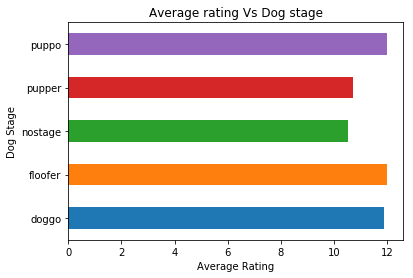

In [101]:
# Plotting average ratings for all dog stages
twitter_archive_master.groupby('dog_stage')['rating'].mean().plot(kind='barh')
plt.title('Average rating Vs Dog stage')
plt.ylabel('Dog Stage')
plt.xlabel('Average Rating');

> Above bar chart shows the average ratings per each dog stage. There is no significant difference between
  average ratings for any of these dog stages. All the average ratings are close to 12. Pupper's average rating
  is actually little bit lower, still it's not far from the rest. We can conclude that the average rating for all
  the dogs are similar.

>***Which dog stage has higher number of tweets?***

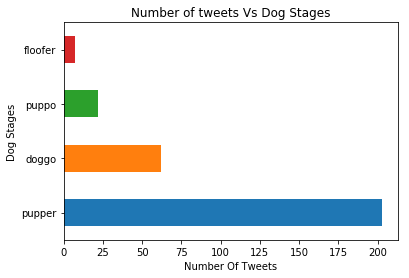

In [102]:
# Histogram to visualize dog types
# filtering count <250 to exclude dogs with 'nostage'
dogs = twitter_archive_master.groupby('dog_stage').filter(lambda x: len(x) < 250)

dogs['dog_stage'].value_counts().plot(kind = 'barh')
plt.title('Number of tweets Vs Dog Stages')
plt.xlabel('Number Of Tweets')
plt.ylabel('Dog Stages');

> There are four different stages which people discribe their dogs by depending on maturity level of the dog, doggo, floofer, pupper and puppo. The first bar chart clearly shows that there are significantly higher number of tweets about puppers. It's not even close to the rest of the dog stages combined. 

>***Do ratings vary a lot?***

In [103]:

twitter_archive_master.groupby('dog_stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,62.0,11.870968,1.476414,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
nostage,1675.0,10.520000,2.932950,0.0,10.00,11.0,12.0,75.0
pupper,203.0,10.714286,2.074633,3.0,10.00,11.0,12.0,27.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


In [104]:

twitter_archive_master[['favorite_count', 'rating', 'retweet_count']].corr(method='pearson')

,favorite_count,rating,retweet_count
favorite_count,1.000000,0.299320,0.928435
rating,0.299320,1.000000,0.225779
retweet_count,0.928435,0.225779,1.000000


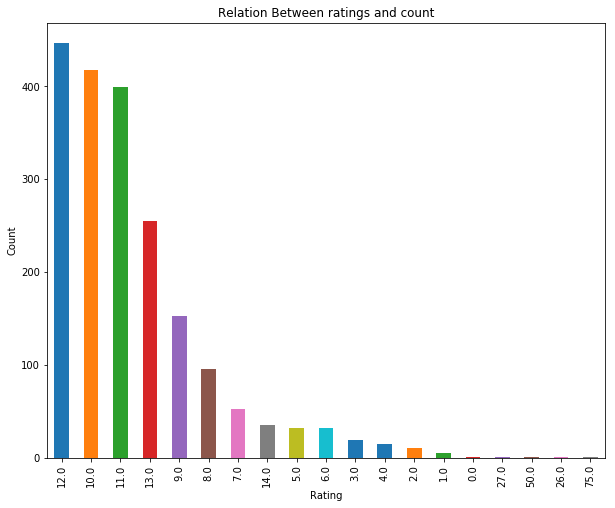

In [105]:
# rating vs count
twitter_archive_master['rating'].value_counts().plot(kind='bar',figsize=(10, 8))
plt.title('Relation Between ratings and count')
plt.xlabel('Rating')
plt.ylabel('Count');


#df.boxplot(column='rating', by='dog_type') - to plot the outliers

> Overall ratings don't vary a lot. 

>***What is the relation between retweet_counts and favorite counts?***

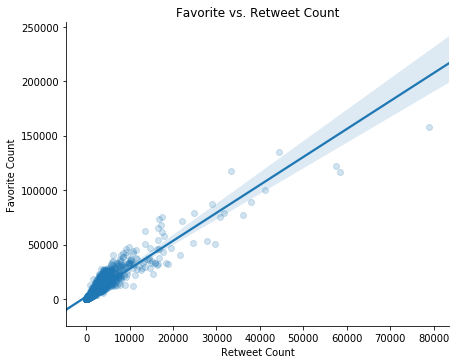

In [116]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_archive_master,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

In [107]:
twitter_archive_master.favorite_count.max()

158284

In [108]:
twitter_archive_master.retweet_count.max()

78918

> Twitter had around 300M users during 2015-2017 and Weratedogs had around 5M followers in 2015-2017. Many of the tweets gets liked and retweeted. Based on our analysis, retweet count and favorite count definitly has a positive correlation as seen in the above visualization. Most of the data points on our scatter plot falls under 10000 retweets and 50000 likes/favorites. Maximum retweet count is close to 79000 and maximum favorite count is close to 15900. We can clearly say that the post with more number of retweets gets more favorites/likes and vise versa.

> ***Do tweets with higher ratings get higher number of likes/retweets?***

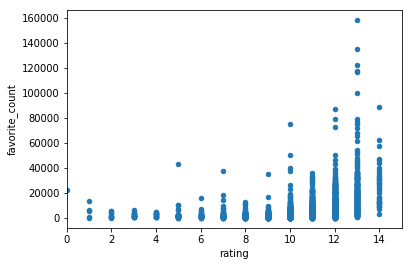

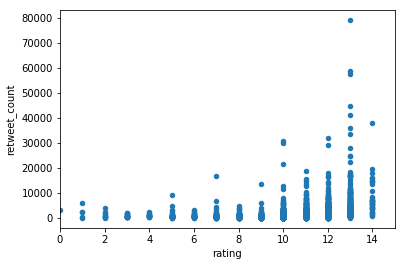

In [109]:
# Plotting rating Vs favorite count
twitter_archive_master.plot(x="rating", y="favorite_count", kind="scatter", xlim=(0., 15.));
twitter_archive_master.plot(x="rating", y="retweet_count", kind="scatter", xlim=((0., 15.)));

> There is a positive correlation between ratings and retweet_count and also between rating and favorite_count.
  The tweets with higher ratings got more likes and also got retweeted more.

> ***What is the trend in terms of number of dog tweets over the available period?***

In [110]:
# Calculate the monthly tweets
from datetime import datetime
# grouping by month
monthly_tweets = twitter_archive_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
# Using only tweet_id count for each month
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

In [111]:
#Find out the min value for timestamp 
twitter_archive_master.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [112]:
#Find out the max value for timestamp 
twitter_archive_master.timestamp.max()

Timestamp('2017-08-01 16:23:56')

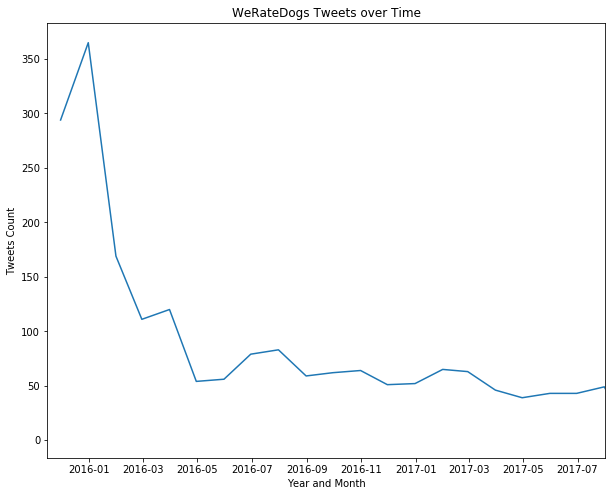

In [113]:
# plottingtime vs. tweet count

plt.figure(figsize=(10, 8))
plt.xlim(pd.Timestamp('2015-11-15'), pd.Timestamp('2017-08-01'))

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

> The data was grouped at month level to analyze the trend about number of tweets. **WeRateDogs** was started in 
  2015 and the initially upward graph shows the increase number of dogs tweets. It was a new concept so may be
  this was a initial surge. It is showing little over 300 dog tweets in the begining of 2016, but after that
  there is a drastic drop in the number of tweets uptill May of 2016. 
> Between 2016-05 and end of 2017, there is steady drop in number of tweets from 65 to below 50. Few times it shows that the number of tweets went up but that be just something related to a viral tweet or a news.
> Overall, number of tweets have dropped to below 50 per month.

>***Top 10 Popular dog names***

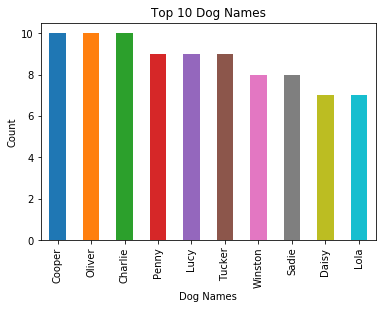

In [114]:
# dog names vs count

# groupby names and filter out None where count is higher than 10. All valid names has a count of maximun 10.
dog_names = twitter_archive_master.groupby('name').filter(lambda x: len(x)<11)
# Get top 10 names using nlargest and plot them against count
dog_names['name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Dog Names')
plt.xlabel('Dog Names')
plt.ylabel('Count');

> Oliver, Cooper and Charlie top the name chart with highest number of tweets.

>***Top 10 most predicted dog breeds***

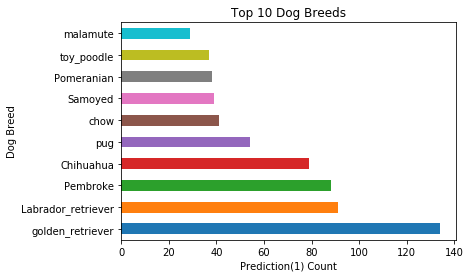

In [115]:
# dog breed vs prediction1 count

# groupby dog breeds and filter out 'Notadog' where count is higher than 134. All valid dog breeds has a count of maximun 134.
dog_breeds = twitter_archive_master.groupby('p1').filter(lambda x: len(x)<135)
# Get top 10 names using nlargest and plot them against count
dog_breeds['p1'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Dog Breeds')
plt.ylabel('Dog Breed')
plt.xlabel('Prediction(1) Count');

> Golden retriever is the top dog beed which was predicted the most. Predcition 2 and 3, also shows Golden retriever as the most predicted dog breed.

<a id='conclusion'></a>
## Conclusion

> There are four different stages which people discribe their dogs by depending on maturity level of the dog,
  doggo, floofer, pupper and puppo. The first bar chart clearly shows that there are significantly higher 
  number of tweets about puppers. It is not even close to the rest of the dog stages combined. We did the 
  analysis if puppers also have higher average ratings compare to rest of the dogs. 
  There is no significant difference between average ratings for any of these dog stages. All the average 
  ratings are close to 12. Pupper's average rating is actually little bit lower, still it's not far from the
  rest. We can conclude that the average rating for all the dogs are similar.
  
> Twitter had around 300M users during 2015-2017 and Weratedogs had around 5M followers in 2015-2017. Many of the
  tweets gets liked and retweeted. Based on our analysis, retweet count and favorite count definitly has a 
  positive correlation as seen in the above visualization. Most of the data points on our scatter plot falls
  under 10000 retweets and 50000 likes/favorites. Maximum retweet count is close to 79000 and maximum favorite 
  count is close to 15900. We can clearly say that the post with more number of retweets gets more 
  favorites/likes and vise versa.
  
> There is a positive correlation between ratings and retweet_count and also ratings and favorite_count. 
  The tweets with higher ratings got more likes and also gor retweeted more.
  
> **WeRateDogs** was started in 
  2015 and the initially upward graph shows the increase number of dogs tweets. It was a new concept so may be
  this was a initial surge. It is showing little over 300 dog tweets in the begining of 2016, but after that
  there is a drastic drop in the number of tweets uptill May of 2016. Between 2016-05 and end of 2017, there is
  steady drop in number of tweets from 65 to below 50. Few times it shows that the number of tweets went up but
  that be just something related to a viral tweet or a news. Overall, number of tweets have dropped to below 50
  per month.
  
> Oliver, Cooper and Charlie top the name chart with highest number of tweets.

> Golden retriever is the top dog beed which was predicted the most. Predcition 2 and 3, also shows Golden retriever as the most predicted dog breed.

Reference links:

https://stackoverflow.com/questions/27425015/python-pandas-timeseries-plots-how-to-set-xlim-and-xticks-outside-ts-plo
https://stackoverflow.com/questions/44802561/python-plot-scatter-plot-with-category-and-markersize
https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
